In [2]:
import cosmax
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [3]:
# load binary files
file = '../data/z0.bin'

# open file
with open(file, 'rb') as f:
    # read data
    data = f.read()
    # convert to numpy array
    rho = jnp.frombuffer(data, dtype=jnp.float32)

# reshape data
N = 256
rho = rho.reshape(N, N, N)
rho *= 2.777 * 10**11

MPH_h = 60

delta = cosmax.helpers.compute_overdensity(rho)

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


([], [])

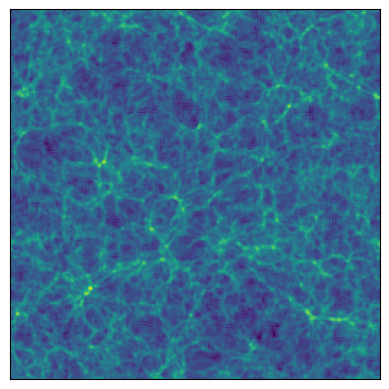

In [7]:
# plot density field
plt.figure()
plt.imshow(jnp.log10(rho[N//2]), origin='lower')
# remove ticks
plt.xticks([])
plt.yticks([])


In [18]:
power_spectrum = cosmax.spectral_ops.PowerSpectrum(
    N, MPH_h, 80)
# compute power spectrum
k, power = power_spectrum(delta)

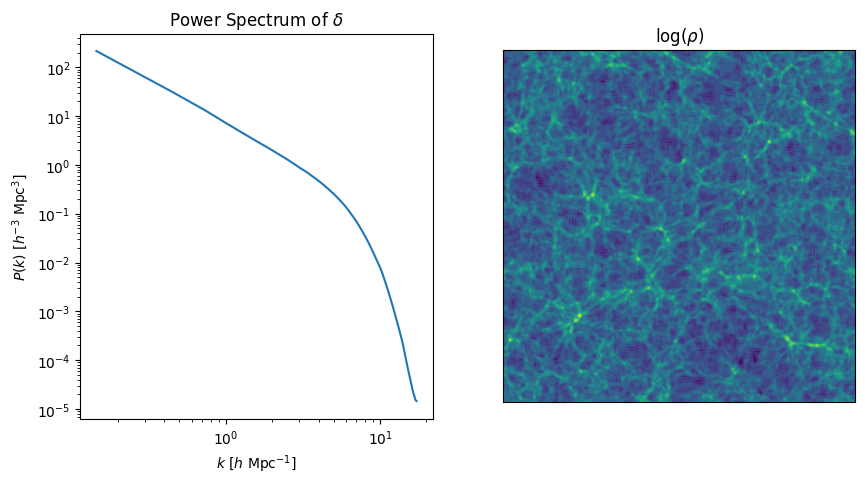

In [19]:
axs, fig = plt.subplots(1, 2, figsize=(10, 5))

fig[1].imshow(jnp.log(rho[N//2]), origin='lower')
fig[1].set_title(r'$\log(\rho)$')
# remove ticks
fig[1].set_xticks([])
fig[1].set_yticks([])

fig[0].plot(k, power, label='cosmax')
fig[0].set_title(r'Power Spectrum of $\delta$')
fig[0].set_xlabel(r'$k$ [$h \ \mathrm{Mpc}^{-1}$]')
fig[0].set_ylabel(r'$P(k)$ [$h^{-3} \ \mathrm{Mpc}^3$]')
fig[0].set_xscale('log')
fig[0].set_yscale('log')
